Análise escola Estaduais - SP

In [17]:
#importando as libs
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno

In [18]:
#lendo os 2 arquivos e selecionando apenas as colunas desejadas do arquivo 2
    ###listaColunas = list(df2.columns.values)
df1 = pd.read_csv('escola.csv', decimal=',')
pd.options.display.max_columns = 50
df2=pd.read_csv('Miest_2021_03.csv', decimal=',', usecols=[
 'DE',
 'CODMUN',
 'MUN',
 'TIPOESC',
 'Tipo_Escola',
 'CODVINC',
 'COD_ESC',
 'NOMESC',
 'ENDESC',
 'NUMESC',
 'COMPLEND',
 'BAIESC',
 'CEP',
 'DS_LATITUDE',
 'DS_LONGITUDE',
 'SALAS_AULA',
 'FLAG_PEI',
 'FLAG_ETI',
 'FLAG-TURNO-MANHA',
 'FLAG-TURNO-INTERMEDIARIO',
 'FLAG-TURNO-TARDE',
 'FLAG-TURNO-VESPERTINO',
 'FLAG-TURNO-NOITE',
 'FLAG-TURNO-INTEGRAL',
 'FLAG-EJA',
 'FLAG-EJA-EM',
 'FLAG-EM',
 'ALEM1S',
 'ALEM2S',
 'ALEM3S',
 'ALEM4S',
 'ALEMNS',
 'Tempo_integral'])

In [19]:
#verificando as colunas importadas do arquivo 2
df2.columns

Index(['DE', 'CODMUN', 'MUN', 'TIPOESC', 'Tipo_Escola', 'CODVINC', 'COD_ESC',
       'NOMESC', 'ENDESC', 'NUMESC', 'COMPLEND', 'BAIESC', 'CEP',
       'DS_LATITUDE', 'DS_LONGITUDE', 'SALAS_AULA', 'FLAG_PEI', 'FLAG_ETI',
       'FLAG-TURNO-MANHA', 'FLAG-TURNO-INTERMEDIARIO', 'FLAG-TURNO-TARDE',
       'FLAG-TURNO-VESPERTINO', 'FLAG-TURNO-NOITE', 'FLAG-TURNO-INTEGRAL',
       'FLAG-EJA', 'FLAG-EJA-EM', 'FLAG-EM', 'ALEM1S', 'ALEM2S', 'ALEM3S',
       'ALEM4S', 'ALEMNS', 'Tempo_integral'],
      dtype='object')

In [20]:
#Lendo o arquivo 1
df1.head()

,id_municipio,rede,diretoria,id_escola,id_escola_sp,nivel_socio_economico
0,3550308,estadual,NORTE 1,35000012,12,2.71
1,3550308,estadual,NORTE 1,35000024,24,3.93
2,3550308,estadual,NORTE 1,35000036,36,4.02
3,3550308,estadual,NORTE 1,35000048,48,4.27
4,3550308,estadual,NORTE 1,35000059,59,4.04


In [21]:
#Juntando os arquivos pelo código e mostrando as colunas do novo dataframe
df3 = df2.merge(df1,left_on='COD_ESC', right_on='id_escola_sp', how='left')
df3.columns

Index(['DE', 'CODMUN', 'MUN', 'TIPOESC', 'Tipo_Escola', 'CODVINC', 'COD_ESC',
       'NOMESC', 'ENDESC', 'NUMESC', 'COMPLEND', 'BAIESC', 'CEP',
       'DS_LATITUDE', 'DS_LONGITUDE', 'SALAS_AULA', 'FLAG_PEI', 'FLAG_ETI',
       'FLAG-TURNO-MANHA', 'FLAG-TURNO-INTERMEDIARIO', 'FLAG-TURNO-TARDE',
       'FLAG-TURNO-VESPERTINO', 'FLAG-TURNO-NOITE', 'FLAG-TURNO-INTEGRAL',
       'FLAG-EJA', 'FLAG-EJA-EM', 'FLAG-EM', 'ALEM1S', 'ALEM2S', 'ALEM3S',
       'ALEM4S', 'ALEMNS', 'Tempo_integral', 'id_municipio', 'rede',
       'diretoria', 'id_escola', 'id_escola_sp', 'nivel_socio_economico'],
      dtype='object')

In [22]:
#verificando o tipo de dado
df3.dtypes

DE                           object
CODMUN                      float64
MUN                          object
TIPOESC                       int64
Tipo_Escola                  object
CODVINC                       int64
COD_ESC                       int64
NOMESC                       object
ENDESC                       object
NUMESC                       object
COMPLEND                     object
BAIESC                       object
CEP                         float64
DS_LATITUDE                 float64
DS_LONGITUDE                float64
SALAS_AULA                  float64
FLAG_PEI                      int64
FLAG_ETI                      int64
FLAG-TURNO-MANHA              int64
FLAG-TURNO-INTERMEDIARIO      int64
FLAG-TURNO-TARDE              int64
FLAG-TURNO-VESPERTINO         int64
FLAG-TURNO-NOITE              int64
FLAG-TURNO-INTEGRAL           int64
FLAG-EJA                      int64
FLAG-EJA-EM                   int64
FLAG-EM                       int64
ALEM1S                      

In [23]:
#verificando os tipos de escola
list(df3['Tipo_Escola'].unique())

['08 - EE',
 '00 - NAO DEFINIDO',
 '40 - PRIVADA - FILANTRÓPICA',
 '48 - PRIVADA - COMUNITARIA',
 '50 - CIEJA',
 '10 - EEI',
 '11 - PAULA SOUZA',
 '34 - FEBEM - UI (CASA À PARTIR DE 2007)',
 '13 - SENAI',
 '09 - FEBEM - UIP (CASA À PARTIR DE 2007)',
 '12 - SENAC',
 '14 - SESI - CE',
 '57 - EAD/Presencial',
 '15 - CLASSE PENITENCIÁRIA',
 '51 - PRIVADA CONFESSIONAL',
 '38 - EDUCAÇÃO PROFISSIONAL - QUALIFICAÇÃO BÁSICA',
 '01 - APAE',
 '44 - ESCOLA EXCLUSIVA DE EDUCAÇÃO COMPLEMENTAR',
 '02 - CCI',
 '28 - USP',
 '37 - EDUACAÇÃO À DISTÂNCIA',
 '41 - EJA - CURSO PREPARATÓRIO',
 '26 - UNESP',
 '03 - CEEJA',
 '31 - QUILOMBO',
 '36 - ÁREA DE ASSENTAMENTO',
 '27 - UNICAMP',
 '39 - SENAI - DISTÂNCIA/BÁSICA',
 '54 - Proeja/Fundamental']

In [24]:
#selecionando quais tipos vamos manter na nossa base
tipoEscola = ['08 - EE', '11 - PAULA SOUZA']
df = df3[df3['Tipo_Escola'].isin(tipoEscola)] 


In [25]:
#verificando o tamanho da base atual
df.shape

(5281, 39)

<AxesSubplot:>

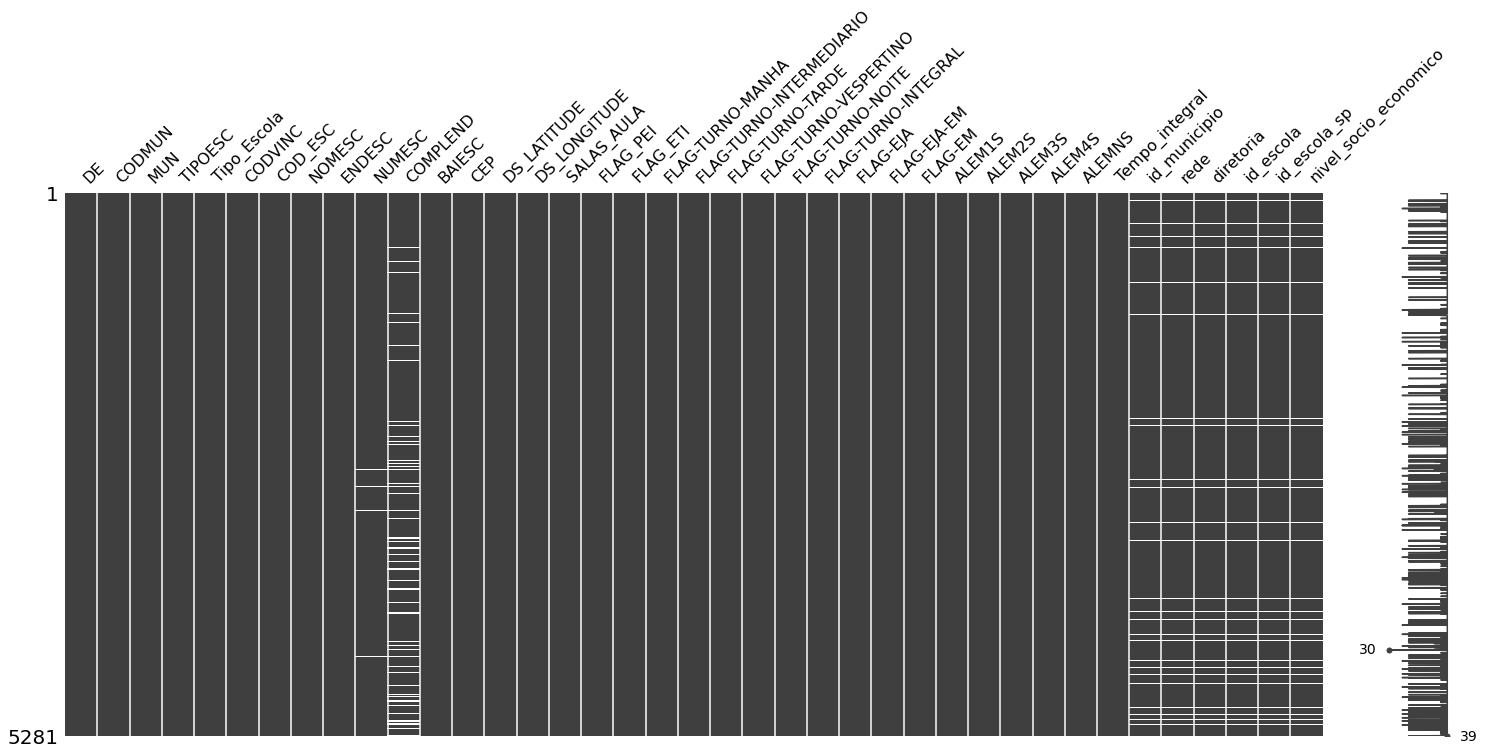

In [26]:
msno.matrix(df)

In [27]:
pd.DataFrame(df.isnull().sum(), columns = ['missing_count']).assign(missing_pct = lambda x: round(x['missing_count']/df.shape[0]*100,4))

,missing_count,missing_pct
DE,0,0.0000
CODMUN,0,0.0000
MUN,0,0.0000
TIPOESC,0,0.0000
Tipo_Escola,0,0.0000
CODVINC,0,0.0000
COD_ESC,0,0.0000
NOMESC,0,0.0000
ENDESC,1,0.0189
NUMESC,20,0.3787


In [28]:
df.describe()

,CODMUN,TIPOESC,CODVINC,COD_ESC,CEP,DS_LATITUDE,DS_LONGITUDE,SALAS_AULA,FLAG_PEI,FLAG_ETI,FLAG-TURNO-MANHA,FLAG-TURNO-INTERMEDIARIO,FLAG-TURNO-TARDE,FLAG-TURNO-VESPERTINO,FLAG-TURNO-NOITE,FLAG-TURNO-INTEGRAL,FLAG-EJA,FLAG-EJA-EM,FLAG-EM,ALEM1S,ALEM2S,ALEM3S,ALEM4S,ALEMNS,id_municipio,id_escola,id_escola_sp
count,5281.000000,5281.000000,5281.000000,5281.000000,5.281000e+03,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.0,5281.0,5.043000e+03,5.043000e+03,5043.000000
mean,371.224957,8.126112,277786.882219,278222.261125,1.127989e+07,-22.948310,-47.383998,12.485893,0.205075,0.017989,0.817269,0.002462,0.802310,0.000379,0.414884,0.216058,0.175535,0.166824,0.727514,88.209241,85.746828,76.247302,0.0,0.0,3.533143e+06,3.527824e+07,278243.026373
std,207.303174,0.602081,386459.744403,386629.012999,4.808200e+06,0.964878,1.376630,4.966158,0.403795,0.132924,0.386482,0.049559,0.398295,0.019459,0.492749,0.411593,0.380460,0.372854,0.445281,88.761789,91.605431,84.454664,0.0,0.0,1.716246e+04,3.913666e+05,391366.614933
min,100.000000,8.000000,12.000000,12.000000,1.124060e+06,-25.216749,-53.057911,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.500105e+06,3.500001e+07,12.000000
25%,182.000000,8.000000,16248.000000,16263.000000,7.152230e+06,-23.594700,-47.810600,9.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.518701e+06,3.501596e+07,15963.500000
50%,351.000000,8.000000,35841.000000,35865.000000,1.228938e+07,-23.421400,-46.825291,12.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,75.000000,67.000000,58.000000,0.0,0.0,3.536802e+06,3.503551e+07,35506.000000
75%,562.000000,8.000000,900485.000000,900515.000000,1.473000e+07,-22.487837,-46.531149,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,133.000000,129.000000,115.000000,0.0,0.0,3.550308e+06,3.590128e+07,901277.000000
max,794.000000,11.000000,926103.000000,926103.000000,1.999000e+07,-19.941401,-44.327950,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,640.000000,727.000000,737.000000,0.0,0.0,3.557303e+06,3.592610e+07,926103.000000


In [29]:
df.columns

Index(['DE', 'CODMUN', 'MUN', 'TIPOESC', 'Tipo_Escola', 'CODVINC', 'COD_ESC',
       'NOMESC', 'ENDESC', 'NUMESC', 'COMPLEND', 'BAIESC', 'CEP',
       'DS_LATITUDE', 'DS_LONGITUDE', 'SALAS_AULA', 'FLAG_PEI', 'FLAG_ETI',
       'FLAG-TURNO-MANHA', 'FLAG-TURNO-INTERMEDIARIO', 'FLAG-TURNO-TARDE',
       'FLAG-TURNO-VESPERTINO', 'FLAG-TURNO-NOITE', 'FLAG-TURNO-INTEGRAL',
       'FLAG-EJA', 'FLAG-EJA-EM', 'FLAG-EM', 'ALEM1S', 'ALEM2S', 'ALEM3S',
       'ALEM4S', 'ALEMNS', 'Tempo_integral', 'id_municipio', 'rede',
       'diretoria', 'id_escola', 'id_escola_sp', 'nivel_socio_economico'],
      dtype='object')

In [30]:
#Melhorando a base
df['TotalAlunosEM'] = df['ALEM1S']+df['ALEM2S']+df['ALEM3S']+df['ALEM4S']

C:\Users\51048726\AppData\Local\Temp\ipykernel_19236\154075574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalAlunosEM'] = df['ALEM1S']+df['ALEM2S']+df['ALEM3S']+df['ALEM4S']


In [31]:
df['COD_ESC'] = df['COD_ESC'].astype(str)
df['CODMUN'] = df['CODMUN'].astype(str)
df['TIPOESC'] = df['TIPOESC'].astype(str)
df['CEP'] = df['CEP'].astype(str)
df['SALAS_AULA'] = df['SALAS_AULA'].astype(int)
df['nivel_socio_economico'] = df['nivel_socio_economico'].astype(float)


C:\Users\51048726\AppData\Local\Temp\ipykernel_19236\619684877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COD_ESC'] = df['COD_ESC'].astype(str)
C:\Users\51048726\AppData\Local\Temp\ipykernel_19236\619684877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CODMUN'] = df['CODMUN'].astype(str)
C:\Users\51048726\AppData\Local\Temp\ipykernel_19236\619684877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 28774
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DE                        5281 non-null   object 
 1   CODMUN                    5281 non-null   object 
 2   MUN                       5281 non-null   object 
 3   TIPOESC                   5281 non-null   object 
 4   Tipo_Escola               5281 non-null   object 
 5   CODVINC                   5281 non-null   int64  
 6   COD_ESC                   5281 non-null   object 
 7   NOMESC                    5281 non-null   object 
 8   ENDESC                    5280 non-null   object 
 9   NUMESC                    5261 non-null   object 
 10  COMPLEND                  4821 non-null   object 
 11  BAIESC                    5280 non-null   object 
 12  CEP                       5281 non-null   object 
 13  DS_LATITUDE               5281 non-null   float64
 14  DS_LONG

In [33]:
#mun com mais escolas
EscMun = df.groupby('MUN').size().sort_values(ascending=False)
EscMun.head(10)

MUN
SAO PAULO                1122
GUARULHOS                 169
CAMPINAS                  163
SANTO ANDRE                88
SOROCABA                   81
SAO JOSE DOS CAMPOS        76
SAO BERNARDO DO CAMPO      73
RIBEIRAO PRETO             70
MAUA                       64
PIRACICABA                 60
dtype: int64

In [34]:
df.groupby('MUN').agg({
    'COD_ESC':'count'
    ,'TotalAlunosEM':['sum','mean','median']
    ,'nivel_socio_economico':['mean', 'median']}
    ).sort_values(('COD_ESC','count'), ascending=False)

COD_ESC TotalAlunosEM                     \
                   count           sum        mean median   
MUN                                                         
SAO PAULO           1122        328423  292.712121  175.0   
GUARULHOS            169         49306  291.751479  241.0   
CAMPINAS             163         29500  180.981595  125.0   
SANTO ANDRE           88         19215  218.352273  167.5   
SOROCABA              81         20400  251.851852  219.0   
...                  ...           ...         ...    ...   
NARANDIBA              1           150  150.000000  150.0   
NANTES                 1            95   95.000000   95.0   
MURUTINGA DO SUL       1           113  113.000000  113.0   
MOTUCA                 1           144  144.000000  144.0   
ZACARIAS               1            78   78.000000   78.0   

                 nivel_socio_economico         
                                  mean median  
MUN                                            
SAO PAULO                     4.164067   4.35  
GUARULHOS                     4.810893   4.95  
CAMPINAS                      3.891875   4.12  
SANTO ANDRE                   3.557701   3.49  
SOROCABA                      4.057692   4.18  
...                                ...    ...  
NARANDIBA                     4.990000   4.99  
NANTES                        5.440000   5.44  
MURUTINGA DO SUL              4.730000   4.73  
MOTUCA                        4.470000   4.47  
ZACARIAS                      4.450000   4.45  

[645 rows x 6 columns]

In [35]:

fig = px.scatter(df, x="SALAS_AULA", y="nivel_socio_economico",
	         size="TotalAlunosEM", color='DE',
                 hover_name="NOMESC", log_x=True, size_max=60)
fig.show()